## Data Setup

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
seed = 42  # Choose any seed value
np.random.seed(seed)
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)

# Read in data for second innings
it20_data = pd.read_csv('data_files/ball_by_ball_it20.csv')
innings2 = it20_data.loc[it20_data['Innings'] == 2]

# Drop the last row for each run chase as the result is known
innings2 = innings2.drop(innings2[innings2['Balls Remaining'] == 0].index)
innings2.reset_index(drop=True, inplace=True)

print('No of Matches: ', innings2['Match ID'].nunique())
print('Data Frame Length: ', len(innings2.index))

innings2.head()



/var/folders/dq/r162x_ld4ydb57pdv1b88jh00000gn/T/ipykernel_2296/3973195490.py:12: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  it20_data = pd.read_csv('ball_by_ball_it20.csv')


No of Matches:  1582
Data Frame Length:  173607


,Match ID,Date,Venue,Bat First,Bat Second,Innings,Over,Ball,Batter,Non Striker,Bowler,Batter Runs,Extra Runs,Runs From Ball,Ball Rebowled,Wicket,Method,Player Out,Innings Runs,Innings Wickets,Target Score,Runs to Get,Balls Remaining,Winner,Chased Successfully,Total Batter Runs,Total Non Striker Runs,Batter Balls Faced,Non Striker Balls Faced,Player Out Runs,Player Out Balls Faced
0,1199528,2019-10-24,Dubai International Cricket Stadium,Scotland,Bermuda,2,1,1,DC Stovell,OO Bascome,MRJ Watt,1,0,1,0,0,NaN,NaN,1,0,205,204.0,119,Scotland,0,1,0,1,0,NaN,NaN
1,1199528,2019-10-24,Dubai International Cricket Stadium,Scotland,Bermuda,2,1,2,OO Bascome,DC Stovell,MRJ Watt,0,1,1,1,0,NaN,NaN,2,0,205,203.0,119,Scotland,0,0,1,0,1,NaN,NaN
2,1199528,2019-10-24,Dubai International Cricket Stadium,Scotland,Bermuda,2,1,2,OO Bascome,DC Stovell,MRJ Watt,0,2,2,1,0,NaN,NaN,4,0,205,201.0,119,Scotland,0,0,1,0,1,NaN,NaN
3,1199528,2019-10-24,Dubai International Cricket Stadium,Scotland,Bermuda,2,1,2,DC Stovell,OO Bascome,MRJ Watt,0,0,0,0,0,NaN,NaN,4,0,205,201.0,118,Scotland,0,1,0,2,1,NaN,NaN
4,1199528,2019-10-24,Dubai International Cricket Stadium,Scotland,Bermuda,2,1,3,DC Stovell,OO Bascome,MRJ Watt,0,0,0,0,0,NaN,NaN,4,0,205,201.0,117,Scotland,0,1,0,3,1,NaN,NaN


## Data Pre-processing

The features selected are defined below, I selected the numeric features which I deemed most relevant for predicting run chase success. The data is augmented so that the values of each feature at the beginning of each innings are included. This is because the ball by ball data considers the values of datapoints such as 'Runs to Get' and 'Balls Remaining' as the values after the ball in question has been bowled. That is to say, the first row of data for each innings gives the state of play after the first ball has been bowled.

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Define the features of the model
features = ['Runs From Ball','Innings Runs', 'Innings Wickets', 'Balls Remaining', 'Target Score', 'Total Batter Runs','Total Non Striker Runs','Batter Balls Faced','Non Striker Balls Faced']


# Step 2: Set the cutoff date
cutoff_date = '2018-01-01'

# Step 3: Split the data into training and test sets based on the cutoff date
train_data = innings2[innings2['Date'] < cutoff_date]
test_data = innings2[innings2['Date'] >= cutoff_date]


# Step 4: Select the relevant features for X and the target variable for y
X_train = train_data[features]
y_train = train_data['Chased Successfully']
X_test = test_data[features]
y_test = test_data['Chased Successfully']



# Step 5: Scale the features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)





Here, the data is split into a training and a test set by setting a cutoff data as 1/1/2018, any match before before that date belongs to the training data and any match after that date belongs to the test data. The X data is scaled using the StandardScaler() function, this is important for machine learning classifiers like logistic regression.

## Logistic Regression 

In [46]:
from sklearn.linear_model import LogisticRegression


for c in [0.1, 1, 10]:
    print('Regularisation  Hyperparameter: ', c)
    # Train the logistic regression model
    model = LogisticRegression(C=c)
    model.fit(X_train, y_train)

    # Evaluate the model on the testing set
    score = model.score(X_test, y_test)
    # Print the accuracy
    print("Accuracy:", score)
    print()





    

Regularisation  Hyperparameter:  0.1
Accuracy: 0.8209163131785175

Regularisation  Hyperparameter:  1
Accuracy: 0.8210511179811633

Regularisation  Hyperparameter:  10
Accuracy: 0.8210421309943202



The accuracy is roughly the same for all three regularization values, however $c=1$ achieves slightly higher accuracy than the other two values. Let $c=1$. Below, the values of the coefficients are plotted for each of the features in this model.

Accuracy: 0.8210511179811633


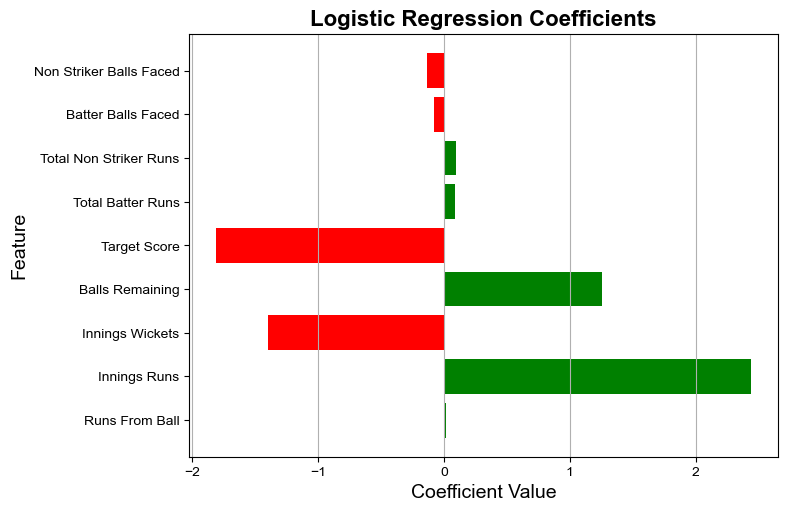

In [47]:
# Train the logistic regression model
model = LogisticRegression(C=1)
model.fit(X_train, y_train)

# Evaluate the model on the testing set
LR_score = model.score(X_test, y_test)
# Print the accuracy
print("Accuracy:", LR_score)

#Get the coefficients
coefs = model.coef_[0]

# Create horizontal bar plot with colors
colors = ['green' if c > 0 else 'red' for c in coefs]
fig, ax = plt.subplots()
ax.barh(features, coefs, color=colors)

# Adjust layout and font
fig.set_size_inches(8, 5)
plt.tight_layout(pad=2)
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial']

# Add title and axis labels
ax.set_title('Logistic Regression Coefficients', fontsize=16, fontweight='bold')
ax.set_xlabel('Coefficient Value', fontsize=14)
ax.set_ylabel('Feature', fontsize=14)

# Add horizontal grid lines
ax.xaxis.grid(True)



# Show plot
plt.show()

## Random Forest

In [65]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)

# Iterate over different number of trees
sweep = [25, 50, 100, 150, 250, 500]
for estimators in sweep:
    print('Number of Trees: ', estimators)

    # Create random forest classifier with specified number of trees
    rf_classifier = RandomForestClassifier(n_estimators = estimators, random_state=42)

    # Fit the model on the training data
    rf_classifier.fit(X_train, y_train)

    # Make predictions on the testing data
    y_pred = rf_classifier.predict(X_test)

    # Calculate accuracy of the model
    accuracy = accuracy_score(y_test, y_pred)

    # Print accuracy of the model
    print("Accuracy:", accuracy)
    print()

Number of Trees:  25
Accuracy: 0.7880239413329498

Number of Trees:  50
Accuracy: 0.7893090804515063

Number of Trees:  100
Accuracy: 0.7902167661226543

Number of Trees:  150
Accuracy: 0.79067510245165

Number of Trees:  250
Accuracy: 0.7913581134517219

Number of Trees:  500
Accuracy: 0.7905492846358473



Out of the values trialled, the accuracy of the random forest classifier is highest for 250 trees. However, the acuracy is slightly lower than it is for logistic regression. Next, we will see if incorporating deep learning into our experiments can increase performance by building a deep feedforward neural network using PyTorch. Different network depths were experimented with and the neural network with 5 layers seemed able to generalise better than the neural network with 7 or 9 layers. I also tested learning rates of 0.0001 and 0.0005, the former lead to smoother convergence and better accuracy. The network was trained for 10 epochs as this number seemed to roughly minimise the validation loss and maximise validation accuracy.

## Neural Network

Epoch 1 Training Loss: 0.605, Training Accuracy: 0.654
Epoch 1 Validation Loss: 0.485, Validation Accuracy: 0.773
Epoch 2 Training Loss: 0.499, Training Accuracy: 0.764
Epoch 2 Validation Loss: 0.457, Validation Accuracy: 0.790
Epoch 3 Training Loss: 0.482, Training Accuracy: 0.775
Epoch 3 Validation Loss: 0.443, Validation Accuracy: 0.796
Epoch 4 Training Loss: 0.474, Training Accuracy: 0.779
Epoch 4 Validation Loss: 0.436, Validation Accuracy: 0.800
Epoch 5 Training Loss: 0.468, Training Accuracy: 0.783
Epoch 5 Validation Loss: 0.430, Validation Accuracy: 0.803
Epoch 6 Training Loss: 0.464, Training Accuracy: 0.786
Epoch 6 Validation Loss: 0.426, Validation Accuracy: 0.805
Epoch 7 Training Loss: 0.461, Training Accuracy: 0.787
Epoch 7 Validation Loss: 0.424, Validation Accuracy: 0.806
Epoch 8 Training Loss: 0.458, Training Accuracy: 0.788
Epoch 8 Validation Loss: 0.421, Validation Accuracy: 0.807
Epoch 9 Training Loss: 0.456, Training Accuracy: 0.790
Epoch 9 Validation Loss: 0.419, V

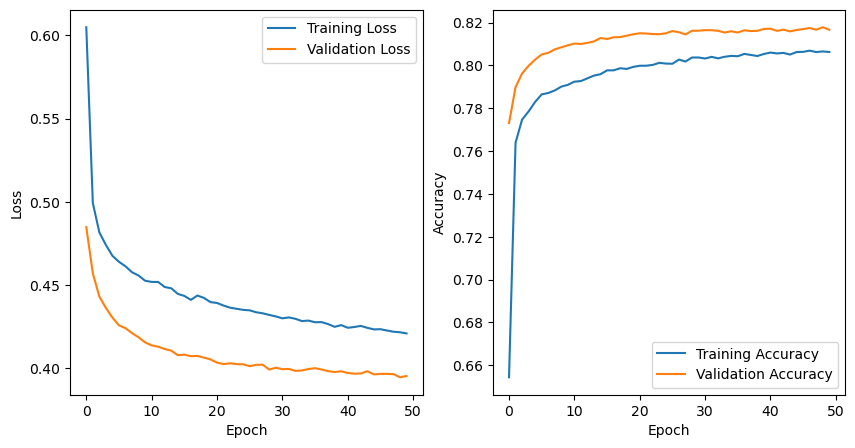

In [5]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# Define the network architecture
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(9, 32) # input layer
        self.fc2 = nn.Linear(32, 32) # hidden layer 1
        self.fc3 = nn.Linear(32, 32)  # hidden layer 2
        self.fc4 = nn.Linear(32, 32) # hidden layer 3
        self.fc5 = nn.Linear(32, 1) # output layer
        self.dropout = nn.Dropout(0.2) # dropout regularization

    def forward(self, x):
        # Apply ReLU activation function for each hidden layer with a sigmoid acitvation function after the last layer 
        x = torch.relu(self.fc1(x))
        x = self.dropout(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout(x)
        x = torch.relu(self.fc3(x))
        x = self.dropout(x)
        x = torch.relu(self.fc4(x))
        x = self.dropout(x)
        x = torch.sigmoid(self.fc5(x))
        return x

# Define the training loop
def train(net, train_loader, val_loader, criterion, optimizer, epochs):
    # Initialize empty lists to store the training and validation losses and accuracies for each epoch
    train_losses = []
    train_accs = []
    val_losses = []
    val_accs = []
    # Loop through the specified number of epochs
    for epoch in range(epochs):
        running_loss = 0.0
        correct = 0
        total = 0
        # Loop through the training data in batches
        for i, data in enumerate(train_loader):
            inputs, labels = data
            # Zero the gradients
            optimizer.zero_grad()
            # Forward pass
            outputs = net(inputs.float())
            # Calculate the loss
            loss = criterion(outputs, labels.float())
            # Backpropagate the loss through the network
            loss.backward()
            # Update the weights
            optimizer.step()
            # Update the running loss and accuracy
            running_loss += loss.item()
            predicted = (outputs >= 0.5).int()
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
        # Calculate average training loss and accuracy for the epoch and append these to their respective lists
        train_loss = running_loss / len(train_loader)
        train_acc = correct / total
        train_losses.append(train_loss)
        train_accs.append(train_acc)
        print('Epoch %d Training Loss: %.3f, Training Accuracy: %.3f' % (epoch + 1, train_loss, train_acc))

        val_loss = 0.0
        correct = 0
        total = 0
        with torch.no_grad():
            for data in val_loader:
                inputs, labels = data
                # Forward pass
                outputs = net(inputs.float())
                # Calculate validation loss
                val_loss += criterion(outputs, labels.float()).item()
                # Keep track of accuracy
                predicted = (outputs >= 0.5).int()
                total += labels.size(0)
                correct += (predicted == labels).sum().item()
        # Calculate the average validation loss and accuracy for the epoch and append these to the correct list
        val_loss /= len(val_loader)
        val_acc = correct / total
        val_losses.append(val_loss)
        val_accs.append(val_acc)
        print('Epoch %d Validation Loss: %.3f, Validation Accuracy: %.3f' % (epoch + 1, val_loss, val_acc))
        
    # Plot the results
    fig, ax = plt.subplots(1, 2, figsize=(10, 5))
    ax[0].plot(train_losses, label='Training Loss')
    ax[0].plot(val_losses, label='Validation Loss')
    ax[0].set_xlabel('Epoch')
    ax[0].set_ylabel('Loss')
    ax[0].legend()
    ax[1].plot(train_accs, label='Training Accuracy')
    ax[1].plot(val_accs, label='Validation Accuracy')
    ax[1].set_xlabel('Epoch')
    ax[1].set_ylabel('Accuracy')
    ax[1].legend()
    plt.show()
   



# Convert training data to PyTorch tensors and create a DataLoader
X_train_tensor = torch.tensor(X_train)
y_train_tensor = torch.tensor(y_train.values.reshape(-1,1))
train_dataset = torch.utils.data.TensorDataset(X_train_tensor, y_train_tensor)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)

# Convert validation data to PyTorch tensors and create a DataLoader
X_val_tensor = torch.tensor(X_test)
y_val_tensor = torch.tensor(y_test.values.reshape(-1,1))
val_dataset = torch.utils.data.TensorDataset(X_val_tensor, y_val_tensor)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=64, shuffle=True)


# Initialize the network, criterion, and optimizer
net = Net()
criterion = nn.BCELoss()
optimizer = optim.Adam(net.parameters(), lr=0.0001, weight_decay=0.0001)

# Train the network
train(net, train_loader, val_loader, criterion, optimizer, epochs=50)




On the validation set, an accuracy of $81.70\%$ is achieved by the ANN with dropout probability $p=0.2$, L2 weight decay parameter 0.0001 and learning rate 0.0001 at the last epoch. This is slightly lower than the figure of $82.11\%$ for the logistic regression model. Achieving an accuracy in excess of $80\%$ for this predictive task would appear on the face of it a plausible and encouraging result. The model was trained on ball-by-ball data from the second innings of 1582 International T20 matches played between 2005 and 2022. Considering the relative lack of information at the start of a run chase, particularly if the target score is reasonably close to the average target score, it should be difficult for the model to make effective predictions. Predicting the result before both teams have batted can always be a dangerous game. With the achieved accuracy score, it's reasonable to assume that the model predicts chase success with an even higher accuracy towards the middle and end of the innings as there is more information to go off. Below, we will split the data by the three main phases of a T20 innings and train a logistic regression classifier for each dataset. The table below displays the highest accuracy score observed for each of the classifiers along with the optimal hyperparameter choice. 

| Classifier | Optimal Hyperparameter Choice | Validation Accuracy |
|----------|----------|----------|
| Logistic Regression | C = 1 | 82.11 |
| Random Forest | No. Trees = 250 | 79.14 |
| Neural Network | Dropout Prob. = 0.2, lr = 1e-4 | 81.70|

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

df = innings2
phases = ['Powerplay', 'Middle Overs', 'Final Overs']
for i, phase in enumerate(phases):
    print('Phase of Play: ', phase)
    if i == 0:
        data = df[df['Balls Remaining'] > 84]
    elif i == 1:
        data = df[(df['Balls Remaining'] > 30) & (df['Balls Remaining'] <= 84)]
    else:
        data = df[df['Balls Remaining'] <= 30]

    # Step 2: Set the cutoff date
    cutoff_date = '2018-01-01'

    # Step 3: Split the data into training and test sets based on the cutoff date
    train_data = data[data['Date'] < cutoff_date]
    test_data = data[data['Date'] >= cutoff_date]


    # Step 4: Select the relevant features for X and the target variable for y
    X_train = train_data[features]
    y_train = train_data['Chased Successfully']
    X_test = test_data[features]
    y_test = test_data['Chased Successfully']



    # Step 5: Scale the features using StandardScaler
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Train the logistic regression model
    model = LogisticRegression(C=1)
    model.fit(X_train, y_train)

    # Evaluate the model on the testing set
    LR_score = model.score(X_test, y_test)

    # Print accuracy of the model
    print("Accuracy of {} Classifier:".format(phase), LR_score)
    

Phase of Play:  Powerplay
Accuracy of Powerplay Classifier: 0.7615261044176707
Phase of Play:  Middle Overs
Accuracy of Middle Overs Classifier: 0.8363027486689368
Phase of Play:  Final Overs
Accuracy of Final Overs Classifier: 0.9124175453801339


| Phase of Play | Test Accuracy |
|----------|----------|
| Powerplay (Overs 1-6) | 76.15 |
| Middle Overs (Overs 7-15) | 83.63 |
| Final Overs  (Overs 16-20) | 91.24 |

As suspected, the classifier which is trained and evaluated on solely the data from overs 1-6 has significantly poorer accuracy compared to the classifiers trained on data from the other two phases of the second innings. In fact, by training and evaluating on purely the data from the middle and final overs respectively, the accuracy achieved increases considerably. Intuitively, this was expected as the poor prediction near the start of the innings was thought to be dragging down the accuracy for the overall classifier. 

This code can be easily altered to train these models on other datasets. I substituted the International T20 dataset for the IPL dataset and the notebook runs fine. The accuracy tended to be slightly lower for each of the models, potentially due to the fact that IPL games are often so evenly matched due to the even distribution of talent. It wouldn't be particulaly difficult to alter this code along with the code in data_frame.py to train these models for ODI data as well if one desired. Earlier, 01/01/2019 was set as the cutoff date. If re-training the model to predict outcomes of live games, the cutoff point can be set as yesterday etc.
